In [21]:
import pandas as pd 

data_frame = pd.read_csv('./assets/car-selling-history.csv')

data_frame.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [22]:
change_to_binary = {
    'no': 0,
    'yes': 1
}

data_frame.sold = data_frame.sold.map(change_to_binary)

data_frame.head()


,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [23]:
from datetime import datetime

data_frame['car_age'] = datetime.today().year - data_frame.model_year
data_frame.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,car_age
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [24]:
data_frame['km_per_year'] = data_frame.mileage_per_year * 1.60934

data_frame.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,car_age,km_per_year
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [25]:
data_frame = data_frame.drop(columns = ["Unnamed: 0", "mileage_per_year", "model_year"] )

data_frame.head()

,price,sold,car_age,km_per_year
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [26]:
describers = data_frame[["price", "car_age", "km_per_year"]]
results = data_frame["sold"]



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5

describers_train, describers_test, results_train, results_test = train_test_split(describers, results, test_size=0.25, stratify=results)

print("We ll train with %d elements e test it with %d elements" % (len(describers_train), len(describers_test)))


We ll train with 7500 elements e test it with 2500 elements


In [51]:
model = LinearSVC()
model.fit(describers_train, results_train)

predictions = model.predict(describers_test)

accuracy = accuracy_score(results_test, predictions)

print("The accuracy %.2f%%" % accuracy)

The accuracy 0.62%
/home/delimanicolas/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [67]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2)

model.fit(describers_train, results_train)

predictions = model.predict(describers_test)

accuracy = accuracy_score(results_test, predictions)

print("The accuracy %.2f%%" % accuracy)

The accuracy 0.75%


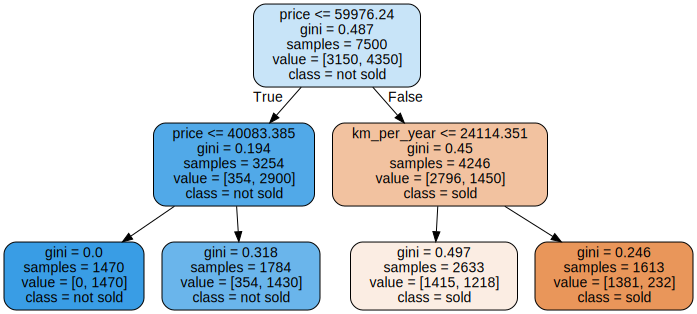

In [70]:
from sklearn.tree import export_graphviz
import graphviz

chart_source = export_graphviz(model, out_file=None, feature_names=describers.columns, rounded=True, filled=True, class_names=["sold", "not sold"])
chart = graphviz.Source(chart_source)

chart